In [11]:
# Examining and selecting data from DataFrames
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = 'dataframe'

df =  obb.equity.price.historical(
    'AAPL',
    start_date='2021-01-01',
    end_date='2021-02-01',
    provider='yfinance'
)

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

In [ ]:
df.values

In [7]:
df.describe()

,open,high,low,close,volume
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,133.133501,135.085503,130.976499,133.092000,1.173251e+08
std,5.491837,5.457884,4.658471,5.303943,2.618671e+07
min,127.720001,128.710007,126.379997,126.599998,8.863680e+07
25%,128.734997,131.037502,127.645000,128.962498,9.820918e+07
50%,131.614998,132.560005,128.654999,131.485001,1.079090e+08
75%,135.942501,139.715000,133.947498,136.924995,1.412881e+08
max,143.600006,145.089996,141.369995,143.160004,1.775238e+08


In [ ]:
df.columns = [
    'open',
    'high',
    'low',
    'close',
    'volume',
]

date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
2021-01-19    127.830002
2021-01-20    132.029999
2021-01-21    136.869995
2021-01-22    139.070007
2021-01-25    142.919998
2021-01-26    143.160004
2021-01-27    142.059998
2021-01-28    137.089996
2021-01-29    131.960007
2021-02-01    134.139999
Name: close, dtype: float64

In [16]:
df['close']

df[['close']]

,close
date,
2021-01-04,129.410004
2021-01-05,131.009995
2021-01-06,126.599998
2021-01-07,130.919998
2021-01-08,132.050003
2021-01-11,128.979996
2021-01-12,128.800003
2021-01-13,130.889999
2021-01-14,128.910004


In [20]:
df.index = pd.to_datetime(df.index)
df['2021-01-04': '2021-01-11']
df[0:6]

,open,high,low,close,volume
date,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,100384500


In [22]:
df.loc[df.index[0]]

open      1.335200e+02
high      1.336100e+02
low       1.267600e+02
close     1.294100e+02
volume    1.433019e+08
Name: 2021-01-04 00:00:00, dtype: float64

In [23]:
df.loc[df.index[0], 'close']

np.float64(129.41000366210938)

In [24]:
df.loc[df.index[0:6], ['close', 'volume']]

,close,volume
date,,
2021-01-04,129.410004,143301900
2021-01-05,131.009995,97664900
2021-01-06,126.599998,155088000
2021-01-07,130.919998,109578200
2021-01-08,132.050003,105158200
2021-01-11,128.979996,100384500


In [25]:
df.loc['2021-01-01':'2021-01-11', ['close', 'volume']]


,close,volume
date,,
2021-01-04,129.410004,143301900
2021-01-05,131.009995,97664900
2021-01-06,126.599998,155088000
2021-01-07,130.919998,109578200
2021-01-08,132.050003,105158200
2021-01-11,128.979996,100384500


In [26]:
df.iloc[3]

open      1.283600e+02
high      1.316300e+02
low       1.278600e+02
close     1.309200e+02
volume    1.095782e+08
Name: 2021-01-07 00:00:00, dtype: float64

In [28]:
df[df.close > df.close.mean()].iloc[:,0]

date
2021-01-21    133.800003
2021-01-22    136.279999
2021-01-25    143.070007
2021-01-26    143.600006
2021-01-27    143.429993
2021-01-28    139.520004
2021-02-01    133.750000
Name: open, dtype: float64

In [30]:
df.loc[
    (df.close > df.close.mean())
    & (df.volume > df.volume.mean())
]

,open,high,low,close,volume
date,,,,,
2021-01-21,133.800003,139.669998,133.589996,136.869995,120150900
2021-01-25,143.070007,145.089996,136.539993,142.919998,157611700
2021-01-27,143.429993,144.300003,140.410004,142.059998,140843800
2021-01-28,139.520004,141.990005,136.699997,137.089996,142621100


In [42]:
df.loc['2021-01']

,open,high,low,close,volume
date,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,100384500
2021-01-12,128.500000,129.690002,126.860001,128.800003,91951100
2021-01-13,128.759995,131.449997,128.490005,130.889999,88636800
2021-01-14,130.800003,131.000000,128.759995,128.910004,90221800


In [43]:
df.at['2021-01-04', 'volume']

np.int64(143301900)

In [45]:
df.nlargest(3, 'volume')

,open,high,low,close,volume
date,,,,,
2021-01-29,135.830002,136.740005,130.210007,131.960007,177523800
2021-01-25,143.070007,145.089996,136.539993,142.919998,157611700
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000


In [47]:
df.query('close > open')

,open,high,low,close,volume
date,,,,,
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200
2021-01-12,128.500000,129.690002,126.860001,128.800003,91951100
2021-01-13,128.759995,131.449997,128.490005,130.889999,88636800
2021-01-19,127.779999,128.710007,126.940002,127.830002,90757300
2021-01-20,128.660004,132.490005,128.550003,132.029999,104319500
2021-01-21,133.800003,139.669998,133.589996,136.869995,120150900
2021-01-22,136.279999,139.850006,135.020004,139.070007,114459400
2021-02-01,133.750000,135.380005,130.929993,134.139999,106239800


In [59]:
# Calculating asset returns using pandas
import numpy as np
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = 'dataframe'

data = obb.equity.price.historical(
    'AAPL',
    provider='yfinance'
)

df = data.loc[:,['close']]

df.index = pd.to_datetime(df.index)
df['close'].pct_change(freq='ME').dropna()
# df['compound'] = np.log(df['close'] / df['close'].shift(1))
# print(df)


date
2024-10-31   -0.003924
2024-12-31    0.045202
2025-01-31   -0.057583
2025-02-28    0.024746
2025-03-31   -0.081500
2025-04-30   -0.043353
2025-06-30    0.017204
2025-07-31    0.011698
2025-09-30    0.108436
Name: close, dtype: float64

In [3]:
# Measuring the volatility of a return series
import numpy as np
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = 'dataframe'

df = obb.equity.price.historical(
    'AAPL',
    start_date='2020-01-01',
    provider='yfinance'
)

close = df['close']

returns = close.pct_change()

std_dev = returns.dropna().std()

annualized_std_dev = std_dev * np.sqrt(252)
print(annualized_std_dev)

0.3226917622352331


In [4]:
close.index = pd.to_datetime(close.index)
(
    close
    .pct_change(freq='ME')
    .dropna()
    .std()
    * np.sqrt(12)
)

np.float64(0.2872785471056701)

In [5]:
(
    close
    .pct_change(freq='QE')
    .dropna()
    .std()
    * np.sqrt(4)
)

np.float64(0.35526618094482376)

<Axes: xlabel='date'>

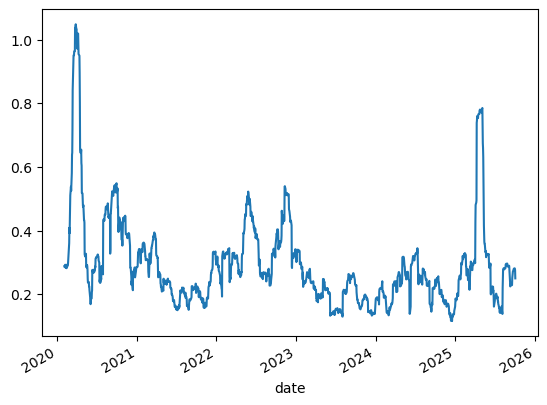

In [12]:
import matplotlib.pyplot as plt

(
    close
    .pct_change()
    .rolling(window=22)
    .std()
    * np.sqrt(252)
).plot()

<Axes: xlabel='date'>

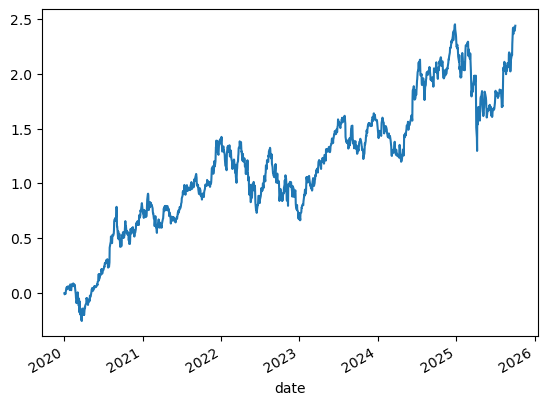

In [ ]:
# Gnerating a cumalative return series
returns = close.pct_change()
returns[np.isnan(returns)] = 0
# returns.fillna(0.0, inplace=True) # inplace=True means modify the original object

returns += 1

cumulative_return = returns.cumprod() - 1

cumulative_return.plot()
 

<Axes: xlabel='date'>

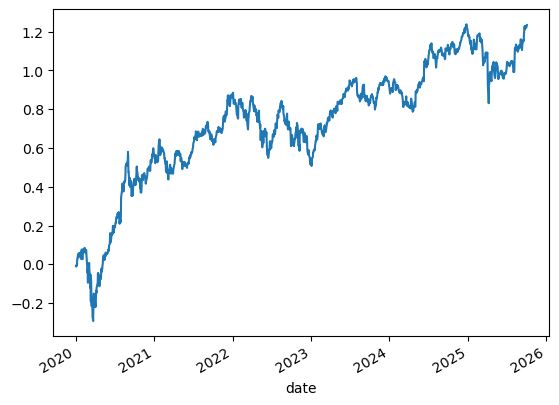

In [14]:
log_returns = np.log(close / close.shift(1))
cumulative_log_return = log_returns.cumsum()
cumulative_log_return.plot()

In [ ]:
# Resampling data for different time frames
import numpy as np
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = 'dataframe'

df = obb.equity.price.historical(
    'AAPL',
    interval = '1m',
    start_date='2025-09-22',
    provider='yfinance'
)

In [42]:
resampled = df.resample(rule='h')['close']

In [43]:
resampled.first()

date
2025-09-22 09:00:00-04:00    249.4994
2025-09-22 10:00:00-04:00    251.3700
2025-09-22 11:00:00-04:00    253.5998
2025-09-22 12:00:00-04:00    255.9850
2025-09-22 13:00:00-04:00    254.1650
                               ...   
2025-10-03 12:00:00-04:00    258.3250
2025-10-03 13:00:00-04:00    258.6300
2025-10-03 14:00:00-04:00    257.2918
2025-10-03 15:00:00-04:00    258.3700
2025-10-03 16:00:00-04:00    258.0300
Freq: h, Name: close, Length: 272, dtype: float64

In [45]:
resampled.last()

date
2025-09-22 09:00:00-04:00    251.095000
2025-09-22 10:00:00-04:00    253.600000
2025-09-22 11:00:00-04:00    256.053100
2025-09-22 12:00:00-04:00    254.210000
2025-09-22 13:00:00-04:00    254.106741
                                ...    
2025-10-03 12:00:00-04:00    258.795000
2025-10-03 13:00:00-04:00    257.437200
2025-10-03 14:00:00-04:00    258.330300
2025-10-03 15:00:00-04:00    258.015000
2025-10-03 16:00:00-04:00    258.030000
Freq: h, Name: close, Length: 272, dtype: float64

In [46]:
resampled.mean()

date
2025-09-22 09:00:00-04:00    250.470257
2025-09-22 10:00:00-04:00    252.366298
2025-09-22 11:00:00-04:00    255.084272
2025-09-22 12:00:00-04:00    254.285607
2025-09-22 13:00:00-04:00    254.271569
                                ...    
2025-10-03 12:00:00-04:00    258.562490
2025-10-03 13:00:00-04:00    258.091385
2025-10-03 14:00:00-04:00    258.005474
2025-10-03 15:00:00-04:00    257.993627
2025-10-03 16:00:00-04:00    258.030000
Freq: h, Name: close, Length: 272, dtype: float64

In [47]:
resampled.ohlc()

,open,high,low,close
date,,,,
2025-09-22 09:00:00-04:00,249.4994,251.110,249.4994,251.095000
2025-09-22 10:00:00-04:00,251.3700,253.600,251.1000,253.600000
2025-09-22 11:00:00-04:00,253.5998,256.530,253.4585,256.053100
2025-09-22 12:00:00-04:00,255.9850,256.060,253.3300,254.210000
2025-09-22 13:00:00-04:00,254.1650,254.825,253.6030,254.106741
...,...,...,...,...
2025-10-03 12:00:00-04:00,258.3250,258.890,258.1932,258.795000
2025-10-03 13:00:00-04:00,258.6300,258.630,257.1600,257.437200
2025-10-03 14:00:00-04:00,257.2918,258.540,257.1332,258.330300


In [48]:
pd.offsets.__all__

['Day',
 'BaseOffset',
 'BusinessDay',
 'BusinessMonthBegin',
 'BusinessMonthEnd',
 'BDay',
 'CustomBusinessDay',
 'CustomBusinessMonthBegin',
 'CustomBusinessMonthEnd',
 'CDay',
 'CBMonthEnd',
 'CBMonthBegin',
 'MonthBegin',
 'BMonthBegin',
 'MonthEnd',
 'BMonthEnd',
 'SemiMonthEnd',
 'SemiMonthBegin',
 'BusinessHour',
 'CustomBusinessHour',
 'YearBegin',
 'BYearBegin',
 'YearEnd',
 'BYearEnd',
 'QuarterBegin',
 'BQuarterBegin',
 'QuarterEnd',
 'BQuarterEnd',
 'LastWeekOfMonth',
 'FY5253Quarter',
 'FY5253',
 'Week',
 'WeekOfMonth',
 'Easter',
 'Tick',
 'Hour',
 'Minute',
 'Second',
 'Milli',
 'Micro',
 'Nano',
 'DateOffset']

In [49]:
df.asfreq('D').to_period()

/tmp/ipykernel_3476/2374583286.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df.asfreq('D').to_period()


,open,high,low,close,volume,vwap,transactions
date,,,,,,,
2025-09-22,248.300,249.5400,248.1200,249.4994,2336778.0,248.6930,33483.0
2025-09-23,255.875,257.0299,255.8100,256.4250,1984402.0,256.2186,22155.0
2025-09-24,255.220,255.7400,254.9000,255.0745,925470.0,255.2677,13099.0
2025-09-25,253.205,254.3200,252.5001,252.6901,1232714.0,253.4281,15552.0
2025-09-26,254.095,254.9200,253.7800,254.5699,1092853.0,254.1072,15706.0
2025-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-29,254.560,254.8700,253.9100,254.0500,1061733.0,254.4499,21061.0
2025-09-30,254.855,255.4000,254.7150,254.7600,851626.0,254.9604,14549.0


In [50]:
df.asfreq(pd.offsets.BDay())

,open,high,low,close,volume,vwap,transactions
date,,,,,,,
2025-09-22 09:30:00-04:00,248.300,249.5400,248.1200,249.4994,2336778.0,248.6930,33483
2025-09-23 09:30:00-04:00,255.875,257.0299,255.8100,256.4250,1984402.0,256.2186,22155
2025-09-24 09:30:00-04:00,255.220,255.7400,254.9000,255.0745,925470.0,255.2677,13099
2025-09-25 09:30:00-04:00,253.205,254.3200,252.5001,252.6901,1232714.0,253.4281,15552
2025-09-26 09:30:00-04:00,254.095,254.9200,253.7800,254.5699,1092853.0,254.1072,15706
2025-09-29 09:30:00-04:00,254.560,254.8700,253.9100,254.0500,1061733.0,254.4499,21061
2025-09-30 09:30:00-04:00,254.855,255.4000,254.7150,254.7600,851626.0,254.9604,14549
2025-10-01 09:30:00-04:00,255.040,255.7700,254.9300,255.2100,1017374.0,255.1457,15281
2025-10-02 09:30:00-04:00,256.575,256.8300,256.2100,256.4600,926474.0,256.5715,13640


In [51]:
# Applying custom fuctions to analyze time series data
df.apply(lambda x: x['high'] - x['low'], axis=1)


date
2025-09-22 09:30:00-04:00    1.4200
2025-09-22 09:31:00-04:00    0.5400
2025-09-22 09:32:00-04:00    0.5650
2025-09-22 09:33:00-04:00    1.2900
2025-09-22 09:34:00-04:00    0.6965
                              ...  
2025-10-03 15:56:00-04:00    0.1450
2025-10-03 15:57:00-04:00    0.2550
2025-10-03 15:58:00-04:00    0.1200
2025-10-03 15:59:00-04:00    0.2700
2025-10-03 16:00:00-04:00    0.0644
Length: 3910, dtype: float64

In [53]:
def fcn(row):
    return row['high'] - row['low']

df.apply(fcn, axis=1)

date
2025-09-22 09:30:00-04:00    1.4200
2025-09-22 09:31:00-04:00    0.5400
2025-09-22 09:32:00-04:00    0.5650
2025-09-22 09:33:00-04:00    1.2900
2025-09-22 09:34:00-04:00    0.6965
                              ...  
2025-10-03 15:56:00-04:00    0.1450
2025-10-03 15:57:00-04:00    0.2550
2025-10-03 15:58:00-04:00    0.1200
2025-10-03 15:59:00-04:00    0.2700
2025-10-03 16:00:00-04:00    0.0644
Length: 3910, dtype: float64

In [54]:
df['valid'] = df.apply(lambda x: x['low'] <= x['low'] <= x['high'], axis=1)
df[df['valid'] == False]

,open,high,low,close,volume,vwap,transactions,valid
date,,,,,,,,


In [55]:
def calculate_range(row, high_col, low_col, threshold):
    range = row[high_col] - row[low_col]
    return range if range > threshold else np.nan
threshold = 1.5
df['range'] = df.apply(
    calculate_range,
    args=('high', 'low', threshold),
    axis=1
)
df.range

date
2025-09-22 09:30:00-04:00   NaN
2025-09-22 09:31:00-04:00   NaN
2025-09-22 09:32:00-04:00   NaN
2025-09-22 09:33:00-04:00   NaN
2025-09-22 09:34:00-04:00   NaN
                             ..
2025-10-03 15:56:00-04:00   NaN
2025-10-03 15:57:00-04:00   NaN
2025-10-03 15:58:00-04:00   NaN
2025-10-03 15:59:00-04:00   NaN
2025-10-03 16:00:00-04:00   NaN
Name: range, Length: 3910, dtype: float64